In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
temp = pd.DataFrame({'Max':Max,'Min':Min,'no':[i for i in range(len(Max))]})

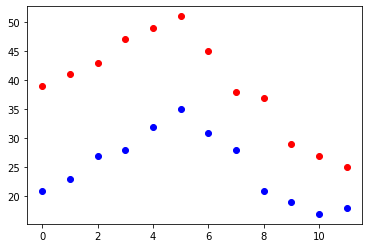

In [3]:
plt.plot(temp['no'],temp['Max'],'ro')
plt.plot(temp['no'],temp['Min'],'bo')

In [4]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, [i for i in range(len(Max))],
                                      Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, [i for i in range(len(Max))],
                                      Min, [-40, 20, 0])

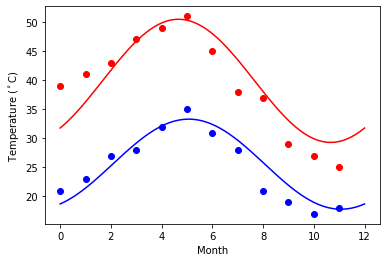

In [5]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot([i for i in range(len(Max))], Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot([i for i in range(len(Max))], Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()